# Objective
- To extract keywords during the first 10 days after Zambia recorded its first 2 cases
- To plot 25 keywords with the most frequency

In [23]:
#packages we will need to achieve our objectives
import pandas as pd
import utils

In [24]:
#fetching our data
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
print(df.shape)
df.head(1)

(5232, 10)


,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username
0,0,NaN,-0.5,Negative,2020-05-13 07:07:33+00:00,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver


In [25]:
#renaming the date column to created_at
df['created_at'] =  pd.to_datetime(df['date'])
#extracting the date from the created at column and making a date column
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username,created_at
0,0,NaN,-0.5,Negative,2020-05-13,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver,2020-05-13 07:07:33+00:00


In [27]:
#Specifying dates for extracting tweets
start_date = "2020-03-17"
stop_date = "2020-03-27"

#Words we dont regard as keywords
meanless_words=['rt','read','chilufya','world','would','fight','de','people','south','http','https','www','due','says','total','take','amp','dr','com', \
                    'today','health','minister','records','w','covid_19','like', \
                    'covid-19','zambia','covid','coronavirus','zambian','country','help','crisis', \
                    'via','us','chng','cases','case','first','countries',\
                    'two','medical','amid','nigeria','global','outbreak','must','confirm','confirmed','virus',\
                   'time','kenya','one','covid19','africa','news','update','let','confirms', \
                    'ministry','live','zimbabwe','corona','botswana', 'burundi','need', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia', 'kenya', 'malawi', 'mozambique', 'namibia', \
                    'rwanda','deaths','president','south','gambia','follow','town','africa','100th','igshid', \
                    'eswatini','recorded','uganda','24hrs','new','pandemic','please','records','march','testing',
                   'nation','number','facebook','reach','still','liberia','p','angola','positive','could','instagram']

#getting tweets within a specific range
get_tweets=utils.get_tweet_for_specific_range(start_date,stop_date,df)

#Extracting only the text column from the tweets
tweet_txt=get_tweets["text"]

#Merging the entire text column so it becomes one corpus
merged_text_col=utils.merge_df_col_val(tweet_txt)

#Removing the RT username from the tweets
remove_RT_from_text=utils.remove_RT(merged_text_col)

#Removing all punctuation marks from the tweets
punct_rmvd_from_txt=utils.remove_punct_marks(merged_text_col)

#removing works that have no meaning such as is, as , the from the text
stp_wrds_rmvd_from_txt=utils.remove_stop_words(punct_rmvd_from_txt)

#Removing the words that have meaning but not considered keywords
meanless_wrds_rmvd_from_txt=utils.remove_meaninglesswords(stp_wrds_rmvd_from_txt,meanless_words)

#Removing numbers frm the text
rmv_numbers_from_txt=utils.remove_numeric(meanless_wrds_rmvd_from_txt)

In [28]:
#The goal here is to come up with a list of keywords with their \
# corresponding frequency

import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,close,99
1,borders,92
2,airport,77
3,sign,73
4,petition,70


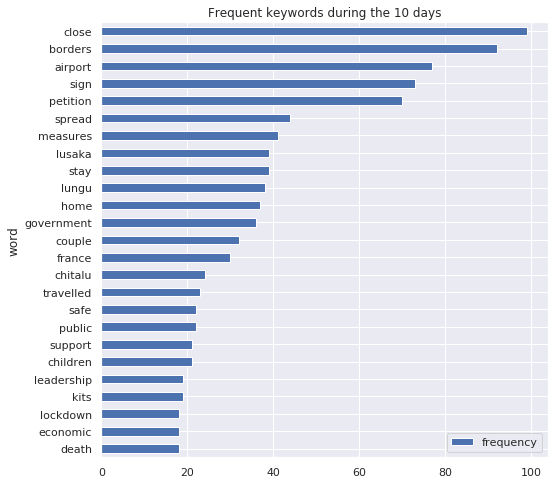

In [22]:
#Finally we plot the 

fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent keywords during the 10 days")
plt.show()